 - Generates single dimensional data using PG model
 - Draws original (latent) Poission intensity at each time point
 - Runs forward-backward with different upper limits on the number of components
 - Visualizes inferred Poisson intesities

In [1]:
%%capture
%run 'BCPM_Implementation.ipynb'

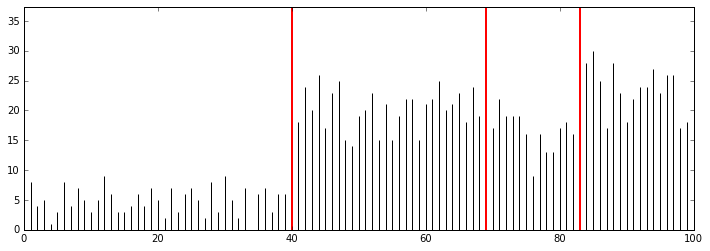

In [2]:
import scipy.stats as ss_

work_dir = '/tmp/toy_example' 
find_or_create(work_dir)

t = 100
p1 = 0.03
m = 0
n = 1
model = Model(p1, np.zeros(0), np.asarray([5]), np.asarray([3]))
model.save(work_dir + '/model.txt')

data = model.generate_data(t)
data.save(work_dir + '/data')
visualize_data(work_dir + '/data', m, n)

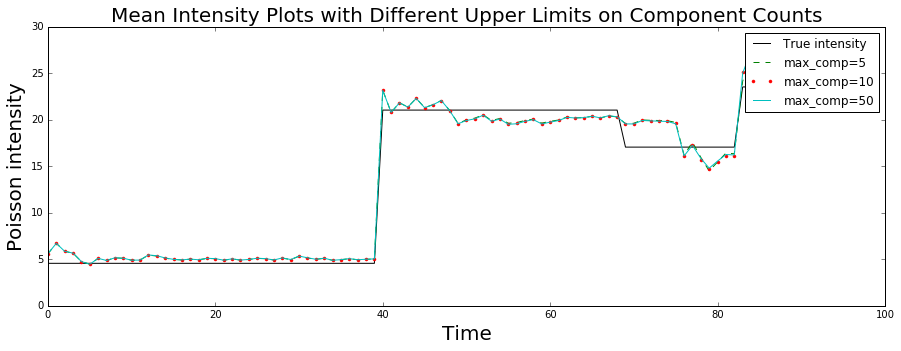

In [3]:
color = ['-k', '--g', '.r', '-c', '-m', '-y', '-b', '--k', '--g', '--r', '--c', '--m', '--y', '--b',
        '-k', '-g', '-r', '-c', '-m', '-y', '-b', '--k', '--g', '--r', '--c', '--m', '--y', '--b']


max_ks = [5, 10, 50]
handles_ = []

xs = np.arange(t)
plt.figure(figsize=(15,5))
h, = plt.plot(data.h[0,:], '-k', label='True intensity')
handles_.append(h)

for i in range(len(max_ks)):
    model = Model(p1, np.zeros(0), np.asarray([4]), np.asarray([4]), max_k=max_ks[i])
    [result, alpha_predict, alpha] = model.filter(data.v, return_message=True)
    h, = plt.plot(result.mean, color[i+1], label='max_comp='+str(max_ks[i]))
    handles_.append(h)

plt.xlabel("Time", fontsize=20)
plt.ylabel("Poisson intensity", fontsize=20)
plt.title("Mean Intensity Plots with Different Upper Limits on Component Counts", fontsize=20)
plt.legend(handles=handles_, loc=1)
plt.savefig("mean_intensity_plots.eps")
plt.show()